# Seaborn - Categorical Plots

În ceea ce provește ploturile denumite categoriacal plots, acestea au rolul de a afișa metrici de țin de partea de statistică per categorie. Un astfel de exemplu poate fi afișarea valorii medie pentru fiecare categorie. Aceste ploturi reprezintă într-un fel partea vizuală pentru operația de 'groupby()' din Pandas. Există două astfel de ploturi și anume:

    - countplot() = numără elementele din DataFrame per categorie

    - barplot() = formă generală de a afișa un anumit metric per categorie

In [2]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the csv file into a DataFrame
df = pd.read_csv('../data/05-Seaborn/dm_office_sales.csv')

In [4]:
# Printing the head of the DataFrame
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


În cadrul acestui DataFrame avem anumite coloane care sunt de tip categorical columns, adică sunt coloane care au anumite categorii la răspunsuri, nu sunt coloane continue. După cum îi spune și denumirea acestui plot (Categorical plot), acesta se ocupă în mare parte cu afișarea datelor pentru acest tip de coloane. În continuare o să afișăm sub formă de plot datele din coloana 'division'. Știm deja că putem să aflăm numărul de valori dintr-o coloană ce aparține de un DataFrame utilizând metoda 'value_counts()' 

In [5]:
df['division'].value_counts()

office supplies      252
printers             250
peripherals          243
computer hardware    159
computer software     96
Name: division, dtype: int64

Informația din această coloană se poate vizualiza utilizând librăria Seaborn, și anume din această librărie utilizând plotul 'countplot()'. Ca și parametrii trebuie să îi oferim DataFrame-ul de unde luăm informațiile și coloana (cea categorică) pentru axa x

<AxesSubplot:xlabel='division', ylabel='count'>

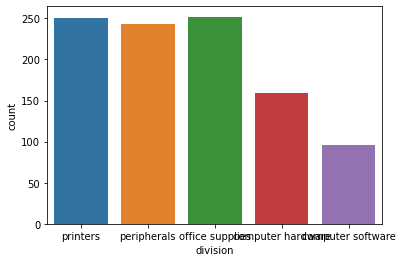

In [6]:
sns.countplot(x='division', data=df)

Graficul respectiv nu se prea înțelege, mai ales în partea de jos, acolo există anumite label-uri care se suprapun. Din moment ce Seaborn este construit peste Matplotlib putem să modificăm caracteristicile acestui grafic (mărimea, rezoluția, etc)

<AxesSubplot:xlabel='division', ylabel='count'>

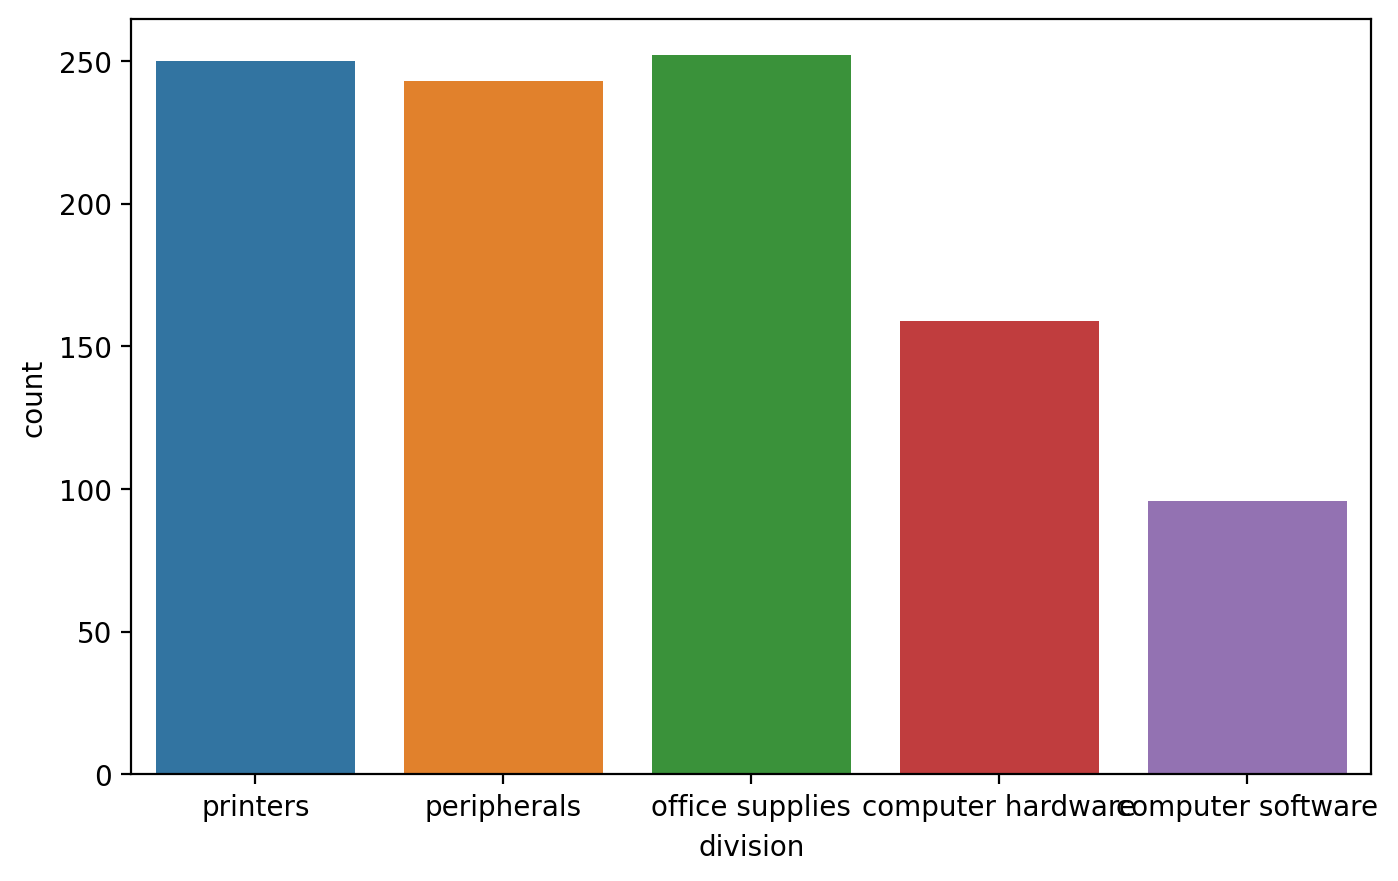

In [8]:
plt.figure(figsize=(8,5), dpi=200)
sns.countplot(x='division', data=df)

Plot-ul de mai sus conține datele ce sunt returnate de codul 'df['division'].value_counts()', însă acuma sunt afișate vizual

Pentru astfel de ploturi putem să ne folosim și de parametrul 'hue' căruia o să îi oferim din nou ca și valoare o coloană de tip categorical. Acest parametru o să mai realizeze din nou încă un count a datelor în funcție de coloana care se specifică.

<AxesSubplot:xlabel='division', ylabel='count'>

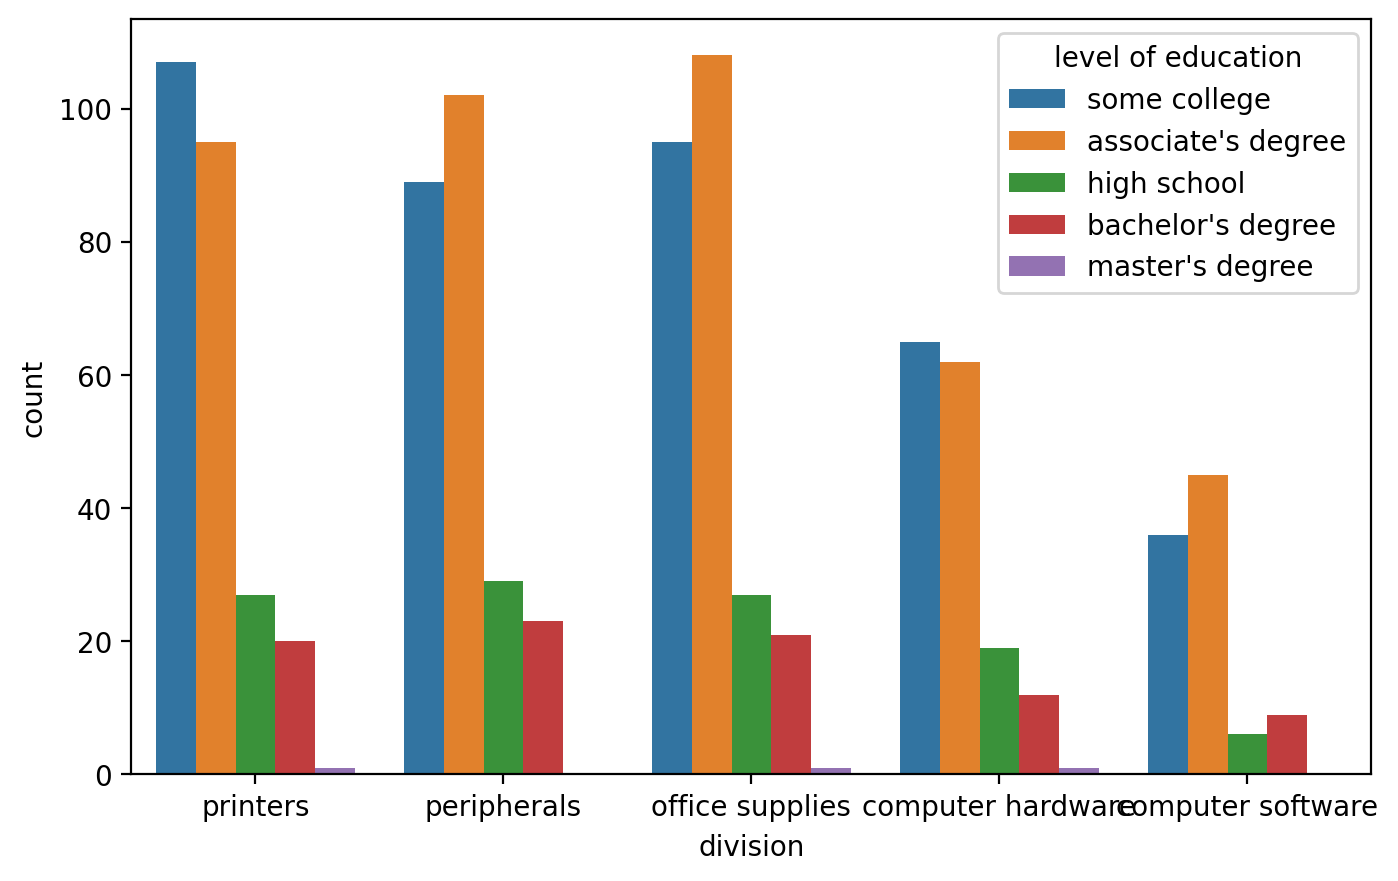

In [10]:
plt.figure(figsize=(8, 5), dpi=200)
sns.countplot(x='division', data=df, hue='level of education')

În acest moment pentru fiecare categorie din division, datele sunt împărțite în funcție de coloana 'level of education'. Asta face mai exact parametrul hue pentru un plot de tipul categorical plot

Până în acest punct în cadrul librăriei Seaborn am învățat despre Scatterplots, Distribution plots și Categorical plots. În ceea ce privește partea de distribution plots, acolo am afișat distribuția unei coloane continue. În unele situații dorim să aflăm distribuția anumitor date care fac parte dintr-o coloană de tip Continuous. Pentru aceste situații mai există o categorie de ploturi ce fac parte din Categorical plots ce poartă denumirea de 'boxplot'. Acest tip de plot ne permite să afișăm distribuția unor date dintr-o coloană categorcă. O să creem un astfel de plot pentru a îl putea explica și înțelege mai bine

<AxesSubplot:xlabel='salary'>

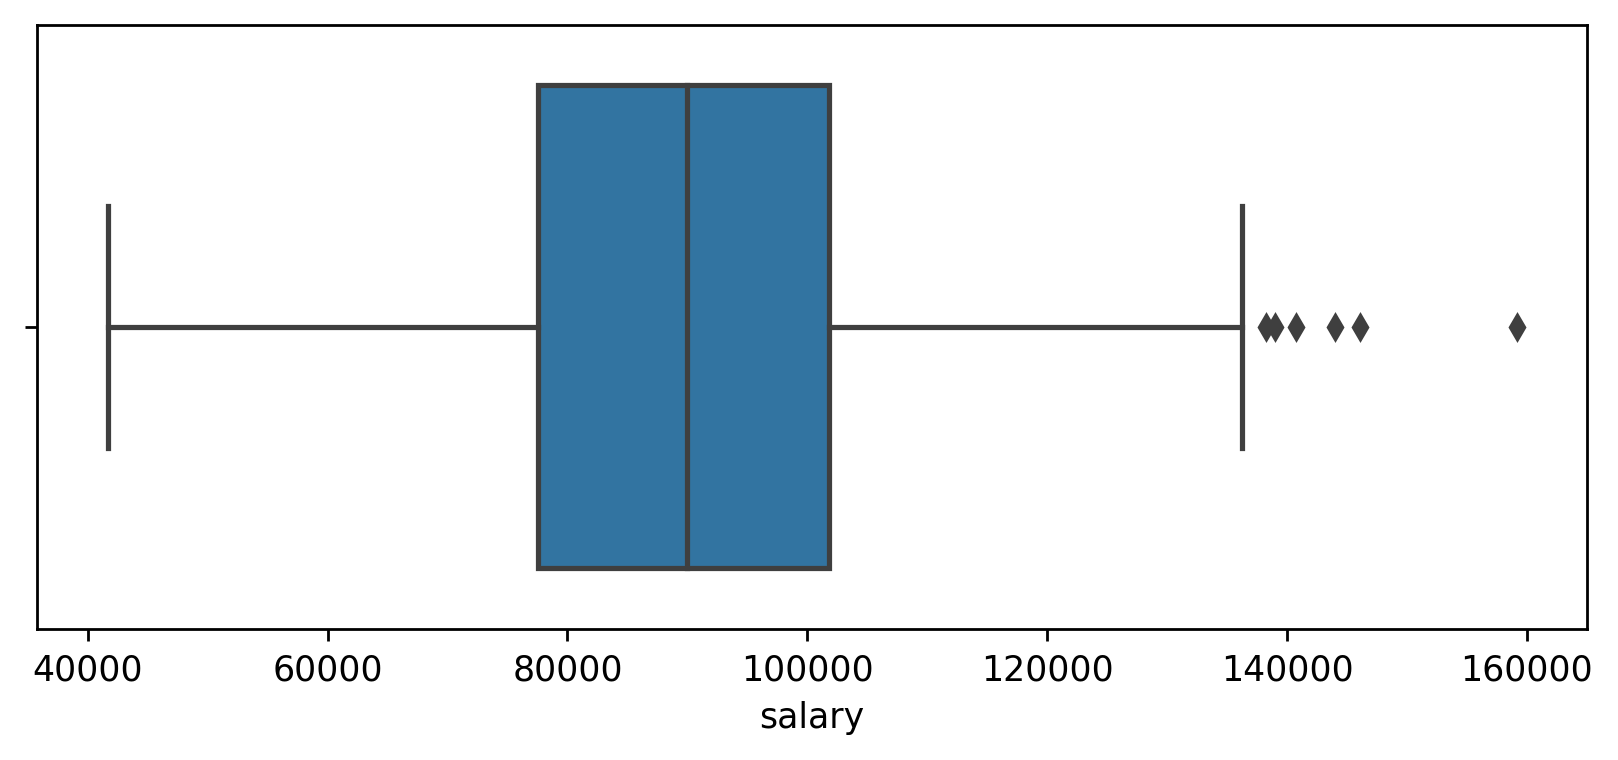

In [16]:
plt.figure(figsize=(8, 3.2), dpi=250)
sns.boxplot(x='salary', data=df)

Ce anume reprezintă toate aceste date din cadrul acestui grafic? Acea linie din mijloc (din cadrul acelui dreptunghi albastru) reprezintă valoare medie pentru salarii, care este undeva aproape la 90.000. Asta înseamnă că jumătate din salariile din acest DataFrame sunt mai mici de 90.000, iar jumătate sunt mai mari. 

Acel dreptunghi (sau acea cutie, de unde și denumirea de boxplot) poartă denumirea de IQR (interquartile range) și reprezintă 50% dintre datele pentru coloana respectivă. Prin alte cuvinte, 50% dintre persoane au salariile cuprinse între undeva un pic sub 80.000 și undeva la puțin peste 100.000. Linia exterioară a acesei cutii reprezintă procentele de 25, respectiv 75. Prima linie, cea aproape de 80.000 reprezintă procentajul de 25%, ceea ce înseamnă că până la acea linie se găsesc 25% dintre toate datelele. Această linie poartă denumirea de Q1. Linia opusă, cea de 75% poartă denumirea de Q3 (datele care sunt după acea linie reprezintă tot 25% dintre datele din coloana respectivă)

Liniile care pronesc din acea cutie poartă denumirea de whiskers și sunt definite ca 1.5 * IQR

Ce depășește range-ul acestor whiskers reprezintă outliers din cadrul unui DataFrame

În continuare o să citim alt fișier csv pentru a mai exeprimenta cu aceste ploturi

In [17]:
# Loading the csv file into a DataFrame
df = pd.read_csv('../data/05-Seaborn/StudentsPerformance.csv')

In [18]:
# Printing the head of the DataFrame
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


În cadrul acestui DataFrame fiecare linie reprezintă un student. Pentru acest DataFrame avem anumite coloane continue, cum ar fi 'math score', 'reading score' și 'writing score' și alte coloane categorice ('gender', 'lunch', 'parental level of education', etc). Să creem un boxplot() pentru coloana 'math score'

<AxesSubplot:ylabel='math score'>

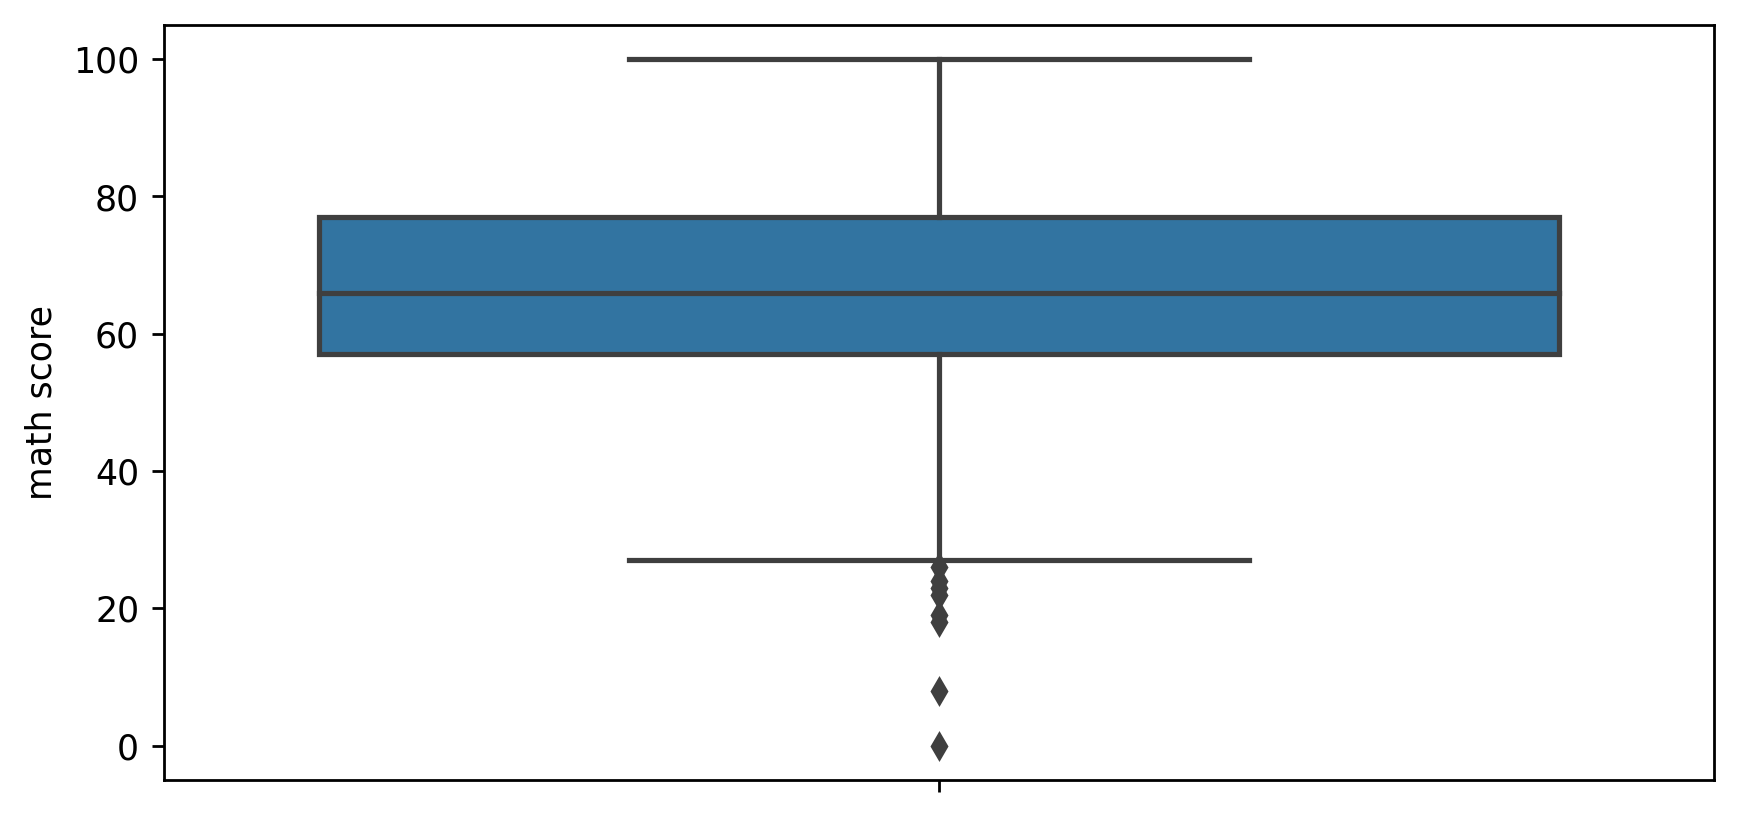

In [20]:
plt.figure(figsize=(8, 4), dpi=250)
sns.boxplot(y='math score', data=df)

În acest plot de mai sus avem distribuția datelor pentru coloana 'math score'. Dacă se dorește se pot separa datele din această coloană în fucție de o coloană categorică. Să împărțim datele respective în funcție de coloana 'test preparation course', care este o coloană care specifică date anumiți studenți s-au pregătit pentru acest test urmând un anumit curs. Pentru a împărți datele în funcție de categoria respectivă doar trebuie să oferim numele coloanei respective pentru parameturl 'x' (sau y, în funcție de cum se trec acești parametri, în funcție de ce dorim să avem pe axele respective)

<AxesSubplot:xlabel='test preparation course', ylabel='math score'>

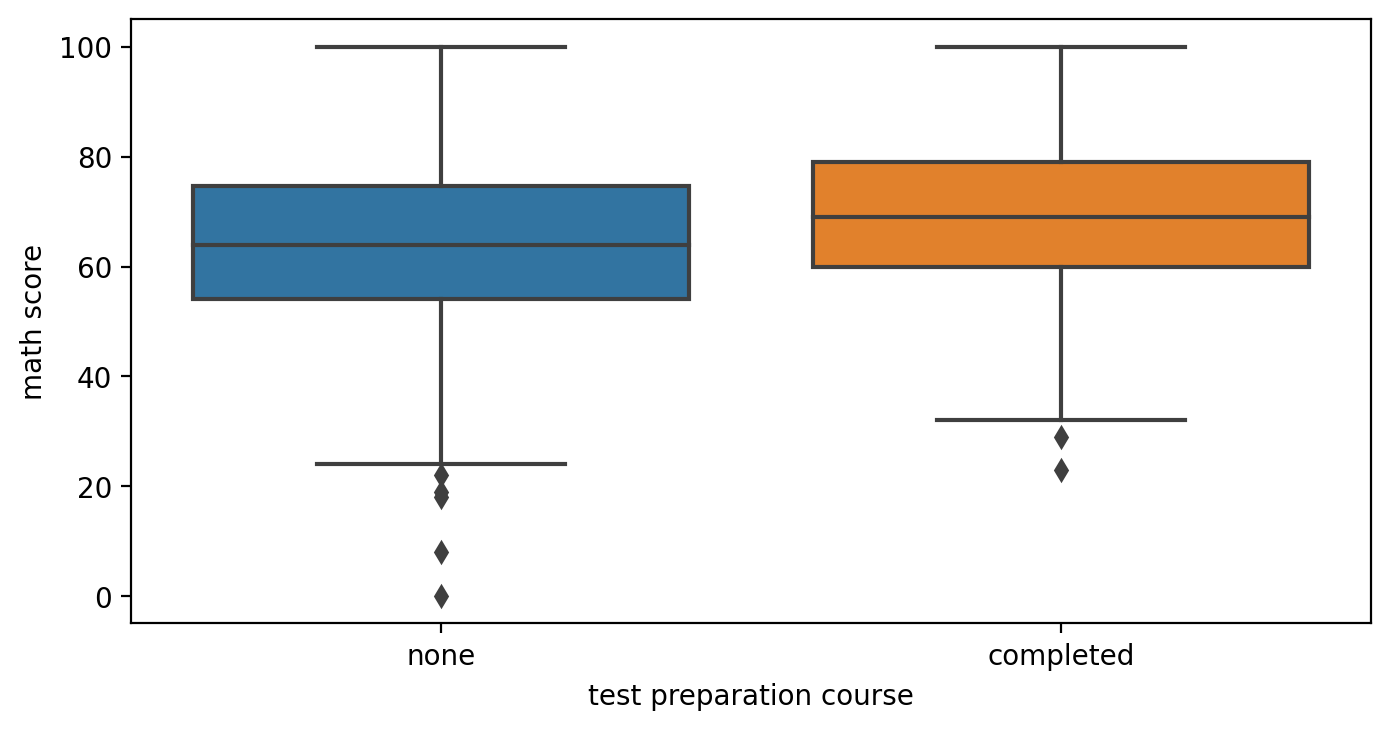

In [21]:
plt.figure(figsize=(8, 4), dpi=200)
sns.boxplot(y='math score', x='test preparation course', data=df)

Din datele de mai sus ne putem da seama că studenții care au completat acel test de pregărire au avut note mai bune decât cei care nu au făcut asta. Aceste date pot fi împărțite și după o coloană cu mai multe categorii, nu numai după o coloană cu două valori. O să împărțim aceste date în funcție de coloana 'parental level of education'

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

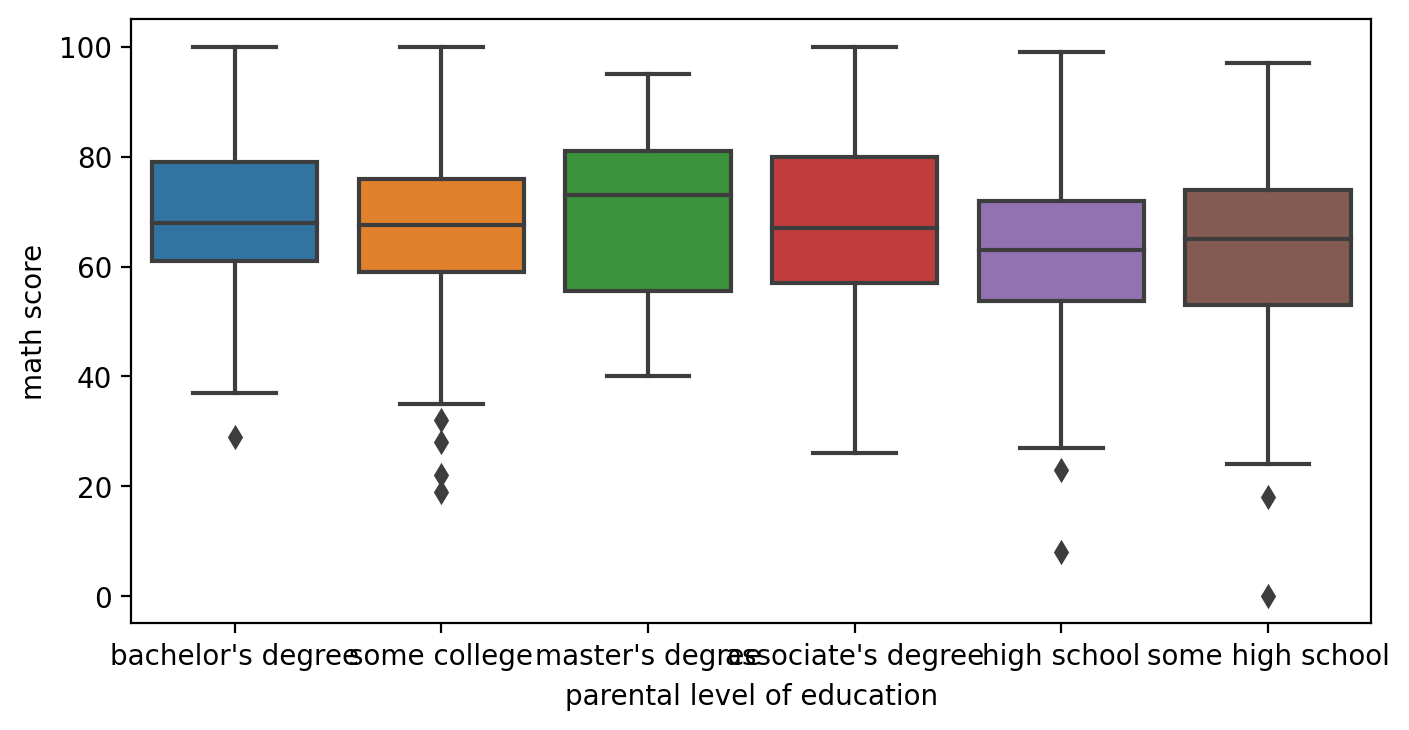

In [23]:
plt.figure(figsize=(8, 4), dpi=200)
sns.boxplot(y='math score', x='parental level of education', data=df)

Dacă se dorește, acest grafic se poate duce și mai departe prin utilizarea parametrului hue. Acest parametru o să mai împartă categoriile respective în funcție de o altă coloană pe care o oferim ca și valoare pentru acel parametru

<AxesSubplot:xlabel='parental level of education', ylabel='reading score'>

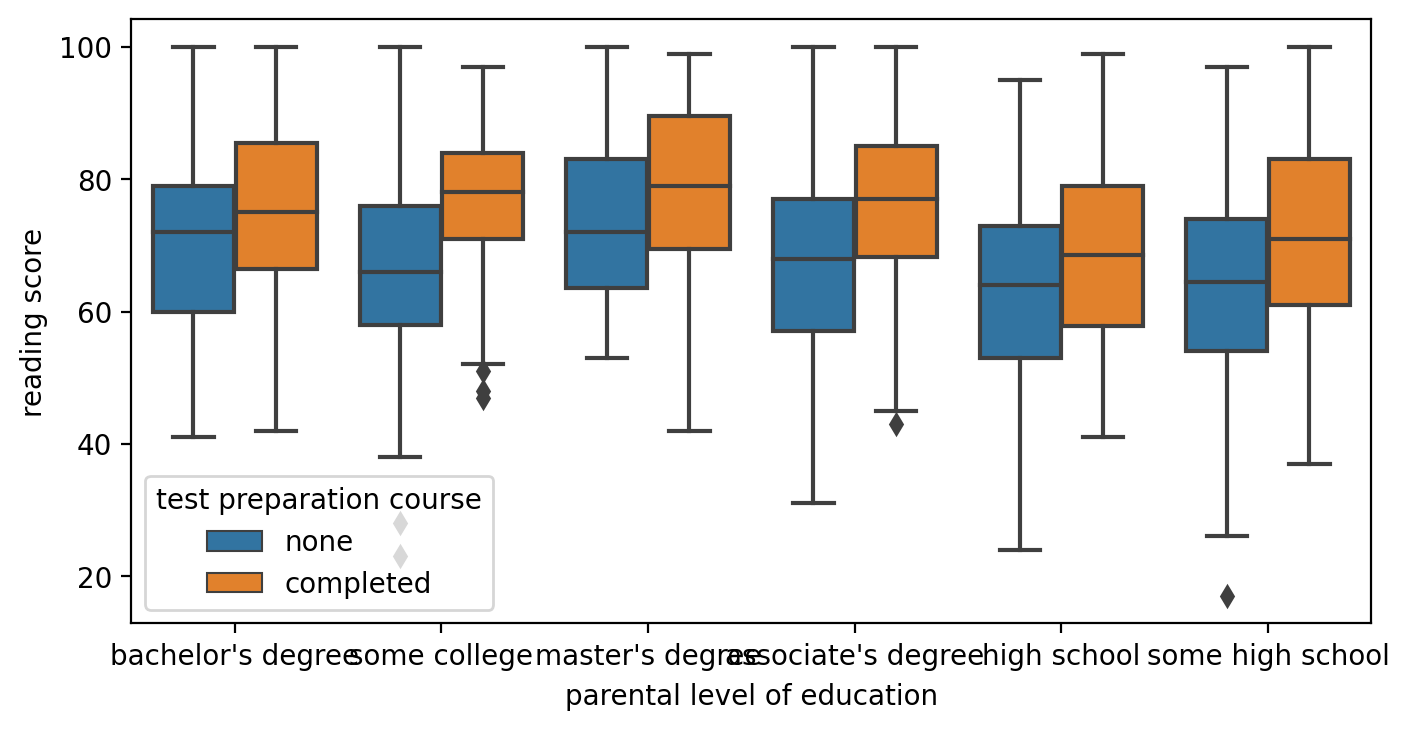

In [25]:
plt.figure(figsize=(8, 4), dpi=200)
sns.boxplot(y='reading score', x='parental level of education', data=df, hue='test preparation course')

Din aceste grafic putem observa distribuția datelor pe categorii în funcție de colonele 'parental level of education' și 'test preparation course'. Se poate observa că la fiecare categorie, cei care s-au pregătit înainte de examen au o medie mai mare la notele obținute.

Mai există un astfel de plot prin care putem afișa distribuția unor categorii, dar acest plot practic ne afișează KDE-ul pentru fiecare categorie în parte. Numele acestui plot este 'violinolot' și se creează utilizând metoda cu aceeași nume

<AxesSubplot:xlabel='math score'>

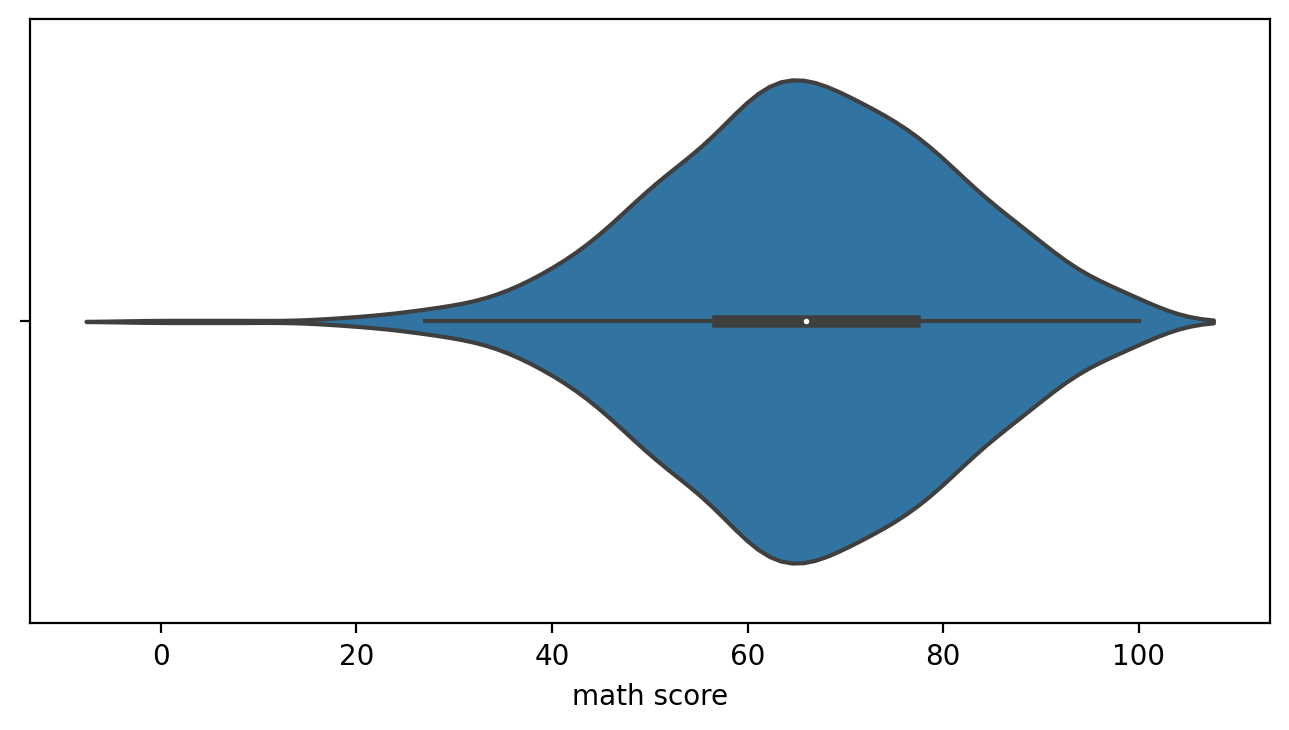

In [26]:
plt.figure(figsize=(8, 4), dpi=200)
sns.violinplot(x='math score', data=df)

Acel punct din mijloc reprezintă mediana datelor, iar linia aceea mai îngorșată reprezintă lungimea IQR-ului dintr-un boxplot. Practic acesta este un boxplot, dar pentru a afișa KDE-ul. De asemenea, acest plot se poate modifica pentru a introduce o coloană categorică sau chiar două utilizând și parametrul de hue

## Recapitulare

În cadrul acetei părți din tutorial am învățat următoarele lucruri:

    1. Cum să creem un plot categori pentru numărul de valori dintr-o coloană categorică 

        sns.countplot(x='division', data=df) # afișează ceea ce retunrează df['division'].value_counts()

    2. Cum să adăugăm încă o coloană pentru a face n grafic mai detaliat 

        sns.countplot(x='division', data=df, hue='level of education') # împarte count-ul din coloana division în funcție de categoriile din coloana 'level of education'

    3. Cum să creem un boxplot pentru o coloană continuă

        sns.boxplot(x='math score', data=df)

    4. Cum să creem un boxplot pentru o coloană continuă, dar separată în funcție de o coloană continuă

        sns.boxplot(x='math score', y='test preparation course', data=df)

    5. La un boxplot putem să adăugăm și un hue pentru a avea mai multe detalii

        sns.boxplot(x='math score', y='test preparation course', data=df, hue='parental level of education')

    6. Cum să creem un violinplot 

        sns.violinplot(x='math score', data=df)